In [36]:
%matplotlib inline

# Import plot styles
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib.dates import MonthLocator, DateFormatter
import calendar


# Import dependencies
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, inspect, func

### Reflect Tables into SQLAlchemy ORM

In [7]:
# Create database connection
database_path = Path("../Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{database_path}")

# Delare a Base using automap_base
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# Diplay all mapped classes
Base.classes.keys()

['measurement', 'station']

In [9]:
# Assign classes to variables
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

In [11]:
# Inspect the tables
inspector = inspect(engine)

    # Display station columns
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c["type"])

    # Display measurement columns
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Precipitation Analysis

In [12]:
# Query to find the most recent date
most_recent_date = session.query(func.max(measurement.date)).scalar()

print(f"The most recent date: {most_recent_date}")

The most recent date: 2017-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent_datetime = dt.datetime.strptime(most_recent_date,"%Y-%m-%d").date()


# Calculate the date one year from the last date in data set.
query_date = most_recent_datetime - dt.timedelta(days=365)
print(f"Query Date: {query_date}")


Query Date: 2016-08-23


In [48]:
# Perform a query to retrieve the date and precipitation
last_year_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

# Save the query results to a dataframe
last_year_prcp_df = pd.DataFrame(last_year_prcp, columns = ["Date", "Precipitation"])

# Sort by date
sorted_prcp_df = last_year_prcp_df.sort_values(by = "Date")

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

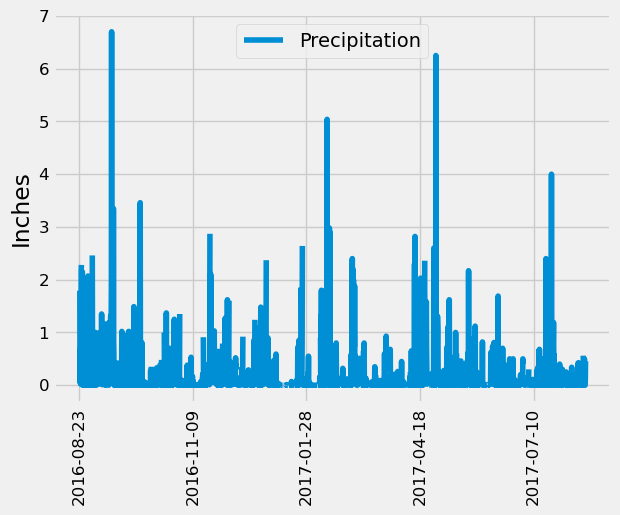

In [149]:
sorted_prcp_df.plot(kind='line',x='Date', xlabel='',ylabel='Inches',legend=True, fontsize = 12)
plt.xticks(rotation=90)

This is daily precipitation data from several weather stations around Honolulu. To make the data more meaningful, we will drop null values and get a daily average precipitation in inches. This will allow us to check for variability in precipitation across the most recent year of data. 

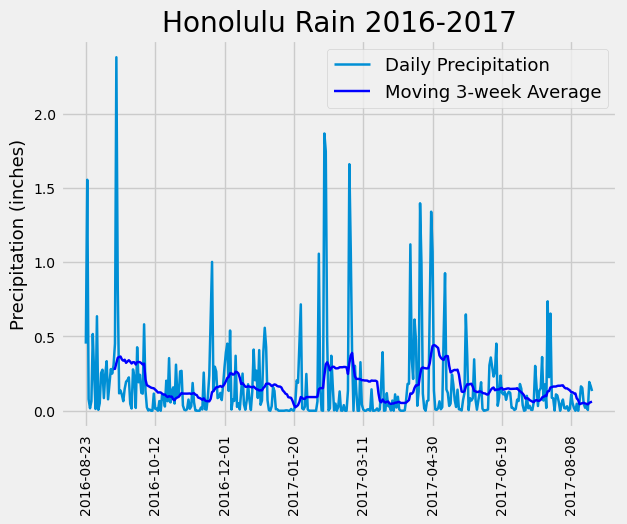

In [141]:
# Drop null rows
clean_prcp = sorted_prcp_df.dropna()

# Convert "Date" column to datetime format
pd.to_datetime(clean_prcp["Date"])

# Aggregate "Precipitation" to get daily average
daily_avg_prcp = clean_prcp.groupby("Date").agg({"Precipitation": "mean"})

# Calculate rolling 21-day average
rolling_avg = daily_avg_prcp['Precipitation'].rolling(21).mean()

# Plot daily average
daily_avg_prcp.plot(linewidth = 1.8, title = "Honolulu Rain 2016-2017")
# Plot the rolling sum on the same plot
rolling_sum.plot(color='blue', linewidth = 1.75)
# Format the plot 
plt.ylabel("Precipitation (inches)", fontsize = 13)
plt.xlabel("")
plt.yticks(fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.legend(['Daily Precipitation','Moving 21-day Average'], fontsize = 13)
plt.show()